# Requirements

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid", 
    font_scale = 2, 
    rc={'figure.figsize':(18,9)}
)

# Visualize

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


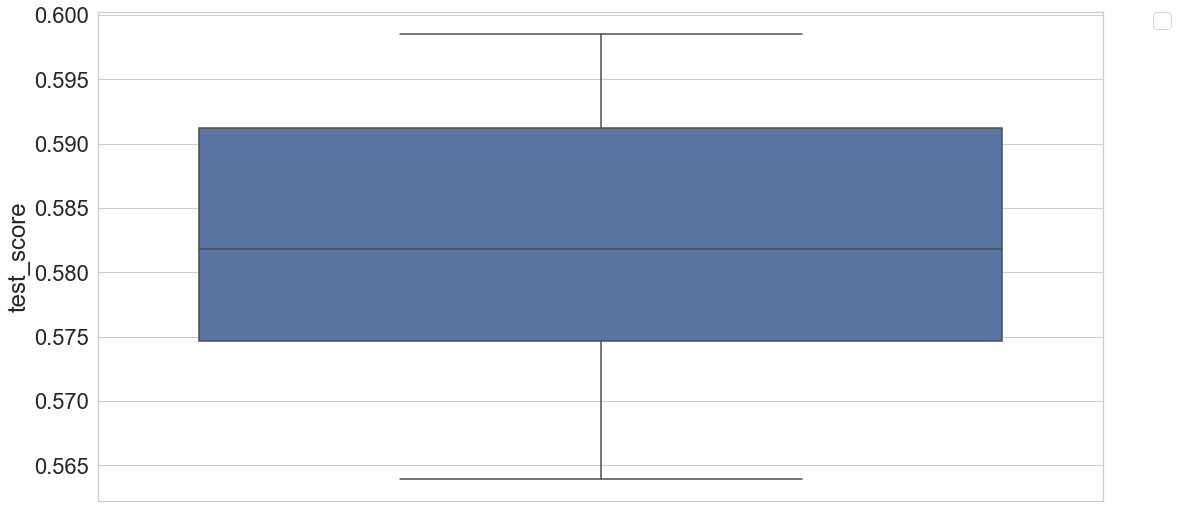

In [10]:
data = pd.read_csv("../logs/221201.235648-experiment-mlp-all/runs.csv")

sns.boxplot(y="test_score",
            data=data)
# sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

# Confusion matrix

In [13]:
path = "../logs/221201.235648-experiment-mlp-all/"

true_labels = []
pred_labels = []
for k in range(5):
    for trial in range(10):
        trial_path = path + f"k_{k}/{trial:04d}/confusion_matrix_data.npz"
        result = np.load(trial_path, allow_pickle=True)
        true_labels.append(result['true_labels'])
        pred_labels.append(result['predicted_labels'])


true_labels = np.hstack(true_labels)
pred_labels = np.hstack(pred_labels)

print(true_labels.shape)
print(pred_labels.shape)

(39110,)
(39110,)


In [14]:
b = np.zeros((pred_labels.shape[0], pred_labels.max() + 1))
b[np.arange(pred_labels.shape[0]), pred_labels] = 1

pred_labels = np.sum(b, axis=0)

b = np.zeros((true_labels.shape[0], true_labels.max() + 1))
b[np.arange(true_labels.shape[0]), true_labels] = 1

true_labels = np.sum(b, axis=0)

print(pred_labels)
print(true_labels)

[0.0000e+00 0.0000e+00 0.0000e+00 7.6000e+01 3.7323e+04 1.6860e+03
 1.5000e+01 4.0000e+00 6.0000e+00]
[  100.   110.  3500.  7720. 11530.  9290.  5530.  1080.   250.]


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, pred_labels)

# RegBert confusion matrix

In [39]:
path = "../logs/test-experiment-bert_sec-regression/"

true_labels = []
pred_labels = []
for k in range(1):
    for trial in range(3):
        trial_path = path + f"k_{k}/{trial:04d}/confusion_matrix_data.npz"
        result = np.load(trial_path, allow_pickle=True)
        true_labels.append(result['y_true'])
        pred_labels.append(result['y_score'])


true_labels = np.hstack(true_labels)
pred_labels = np.hstack(pred_labels)

print(true_labels.shape)
print(pred_labels.shape)

print(pred_labels[1:300])

(2340,)
(780, 3)
[[3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.9522474]
 [3.0873182 2.9768066 2.95

In [27]:
new_true_labels = []
new_pred_labels = []

for label in true_labels:
    new_true_labels += [f"{label:0.1f}"]

for i in range(pred_labels.shape[0]):
    if pred_labels[i] < 1.25:
        new_pred_labels.append("1.0")
    elif pred_labels[i] > 1.25 and pred_labels[i] < 1.75:
        new_pred_labels.append("1.5")
    elif pred_labels[i] > 1.75 and pred_labels[i] < 2.25:
        new_pred_labels.append("2.0")
    elif pred_labels[i] > 2.25 and pred_labels[i] < 2.75:
        new_pred_labels.append("2.5")
    elif pred_labels[i] > 2.75 and pred_labels[i] < 3.25:
        new_pred_labels.append("3.0")
    elif pred_labels[i] > 3.25 and pred_labels[i] < 3.75:
        new_pred_labels.append("3.5")
    elif pred_labels[i] > 3.75 and pred_labels[i] < 4.25:
        new_pred_labels.append("4.0")
    elif pred_labels[i] > 4.25 and pred_labels[i] < 4.75:
        new_pred_labels.append("4.5")
    else: 
        new_pred_labels.append("5.0")


print(new_true_labels[0:20])   
print(new_pred_labels[0:20])   

['2.5', '4.0', '4.0', '4.0', '2.5', '4.0', '2.0', '2.0', '4.0', '3.5', '3.0', '2.5', '2.0', '3.0', '3.5', '2.5', '3.0', '3.0', '2.5', '3.5']
['3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0']


In [36]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(new_pred_labels, new_true_labels)
print(cf_matrix)

[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  6   6 210 462 687 558 333  63  15]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]


<AxesSubplot:>

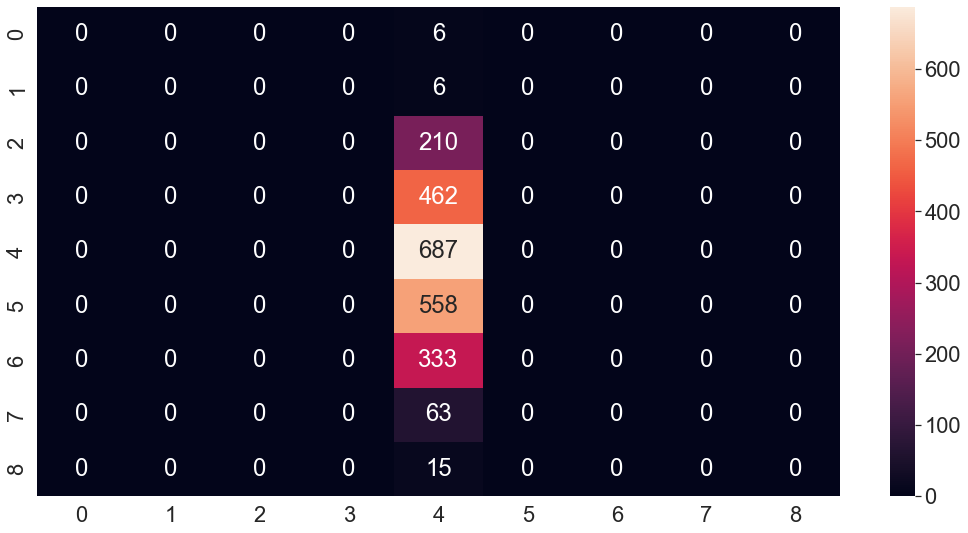

In [33]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='g')